## MLB Analysis

這次我們會簡單的幾句話跟大家說明資料科學在美國職棒的運用及影響，以下我們會分析下列幾項：

* 調整物價波動後，大聯盟平均薪資的變化
* 各隊薪資佔聯盟總薪資的佔比
* 飛球革命對於大聯盟的影響
* 整體薪資和戰績的關係
* 薪資組合和戰績的關係


### 首先先匯入會用到的函式庫

* dylyr: 用於清洗資料
* ggplot2: 用於繪畫圖案

In [7]:
library(dplyr)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.5.3"

### 檔案格式

In [8]:
head(read.csv("球隊薪資\\2018.csv"))
head(read.csv("25人名單薪資\\Arizona Diamondbacks 2011.csv"))
head(read.csv("戰績\\2011.csv"))

Team,Roster,X25.Man.Payroll,Injured.Reserve,Retained,Buried,Suspended,X2018.Total.Payroll,Rank
Boston Red Sox,36,167955780,18074000,41755860,2180000,0,227398860,1
San Francisco Giants,32,119689218,64341827,21136053,3283000,0,205665348,2
Los Angeles Dodgers,40,160502596,3908850,30541679,5590000,0,199582045,3
Chicago Cubs,37,152092957,37451220,1216894,2725000,3200000,194259933,4
Washington Nationals,35,130197979,8999485,41161720,4481000,0,181382609,5
New York Yankees,38,148010829,22568376,9249414,3130000,0,180098151,6


Active.Players,Age,Pos.,Status,Base.Salary,Signing.Bonus,Incentives,Payroll.Salary,Adj...Salary,Payroll..,Lux..Tax.Salary
Kelly Johnson,29,2B,Arb 3,5850000,0,0,5850000,5850000,8.89,0
Joe Saunders,29,SP,Arb 2,5500000,0,0,5500000,5500000,8.36,0
Chris Young,27,RF,Vet,5000000,200000,0,5200000,5200000,7.90,0
Stephen Drew,28,2B,Arb 2,4650000,0,0,4650000,4650000,7.07,0
Justin Upton,23,LF,Vet,4250000,208333,0,4458333,4458333,6.78,0
J.J. Putz,34,RP,Vet,4000000,0,0,4000000,4000000,6.08,0


Name,W,L,PCT,GB,HOME,AWAY,RS,RA,DIFF,STRK,L10
Philadelphia Phillies,102,60,0.630,-,52-29,50-31,713,529,184,W4,4-6
New York Yankees,97,65,0.599,5,52-29,45-36,867,657,210,L4,5-5
Milwaukee Brewers,96,66,0.593,6,57-24,39-42,721,638,83,W2,7-3
Texas Rangers,96,66,0.593,6,52-29,44-37,855,677,178,W6,9-1
Detroit Tigers,95,67,0.586,7,50-31,45-36,787,711,76,W4,7-3
Arizona Diamondbacks,94,68,0.580,8,51-30,43-38,731,662,69,L1,7-3


### 讀取檔案並存取至List中

* 將各年30個球隊的總薪資，讀取轉成dataframe之後，存放在salList中
* 將2011~2018戰績，讀取轉成dataframe之後，standingList

In [9]:
salList <- list()
standingList <- list()
for (i in c(2011:2018))
{
    salList[[i - 2010]] <- read.csv(paste("球隊薪資\\", toString(i), ".csv", sep=""))
    standingList[[i - 2010]] <- read.csv(paste("戰績\\", toString(i), ".csv", sep=""))
}

In [13]:
inflation <- c(1, 1.017, 1.032255, 1.04051304, 1.047796631, 1.069800361, 1.092266168, 1.113019225)
meanSal <- c()

for (i in c(1:8))
{
    meanSal[i] <- mean(salList[[i]][, "X25.Man.Payroll"]) * inflation[i] / 1000000
}
salary <- data.frame(meanSalary=meanSal, year=c(2011:2018))


c <- data.frame(matrix(ncol=2))
colnames(c) <- c("year", "salary")
for (i in c(1:8))
{ 
    tem <- data.frame(year=2010 + i, salary=salList[[i]][, "X25.Man.Payroll"])
    c <- rbind(c, tem)
    c <- c[complete.cases(c),]
}
c <- c %>% mutate(salary = salary/1000000)

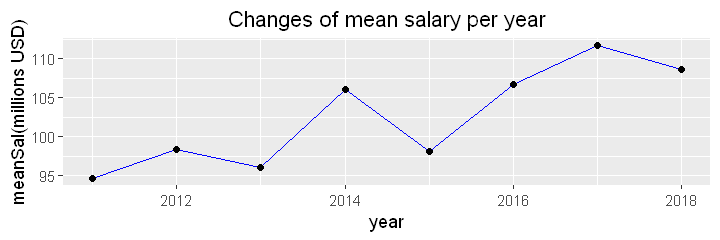

In [14]:
# Create a line plot showing the change in meanSalary over time

options(repr.plot.width=6, repr.plot.height=2)
ggplot(salary, aes(year, meanSalary)) + geom_line(color="blue") + geom_point() +
    ylab("meanSal(millions USD)") + ggtitle("Changes of mean salary per year") +
    theme(plot.title = element_text(hjust=0.5))

In [ ]:
ggplot(c, aes(x=as.factor(year), y=salary)) + geom_boxplot(outlier.colour="black", outlier.shape=16, outlier.size=1, notch=FALSE) +
    xlab("year") + ylab("Salary(millions USD)") + ggtitle("Distribution of salary per year") +
    theme(plot.title = element_text(hjust=0.5)) + scale_fill_brewer(palette="RdBu")